<a href="https://colab.research.google.com/github/kowshik27/GRIP_Intern_Tasks/blob/main/GRIP_Task7_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP Task-7: Stock Market Prediction using Numerical and Textual Analysis** <br>
#**Objective:**
## Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines 

#### We all know that the stock prices fluctuate a lot. Many of great investor do read newspaper and they invest by analyzing the news. <br> In this task, I created a model which predict the stock market price on that day if we provided the model the sentiment analysis of news headlines on that day.

## Here we are going to analyze and predict the S&P BSE 500 stock using Times of India news headlines dataset provided in Harvard Dataverse.

link for headlines dataset: https://bit.ly/36fFPI6<br>
link for stock price(historical) dataset: https://yhoo.it/3uUottI


## Step-1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

## For Numerical analysis of BSE 500 stock historical data

In [ ]:
stock_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BSE-500.BO.csv')

In [ ]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,8620.099609,8685.320313,8601.240234,8660.629883,8660.629883,325195300.0
1,2008-01-02,8703.620117,8787.360352,8595.080078,8765.730469,8765.730469,427995000.0
2,2008-01-03,8733.559570,8817.089844,8719.849609,8746.040039,8746.040039,344790300.0
3,2008-01-04,8770.099609,8888.599609,8770.099609,8850.480469,8850.480469,381472400.0
4,2008-01-07,8817.230469,8910.370117,8764.839844,8882.280273,8882.280273,355712200.0
...,...,...,...,...,...,...,...
3292,2021-05-06,19866.359375,19922.769531,19758.269531,19903.849609,19903.849609,200.0
3293,2021-05-07,NaN,NaN,NaN,NaN,NaN,NaN
3294,2021-05-10,20126.169922,20198.650391,20102.199219,20173.759766,20173.759766,300.0
3295,2021-05-11,20022.199219,20183.779297,19971.990234,20132.550781,20132.550781,300.0


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3297 non-null   object 
 1   Open       3254 non-null   float64
 2   High       3254 non-null   float64
 3   Low        3254 non-null   float64
 4   Close      3254 non-null   float64
 5   Adj Close  3254 non-null   float64
 6   Volume     3254 non-null   float64
dtypes: float64(6), object(1)
memory usage: 180.4+ KB


In [ ]:
stock_data.isnull().sum()

Date          0
Open         43
High         43
Low          43
Close        43
Adj Close    43
Volume       43
dtype: int64

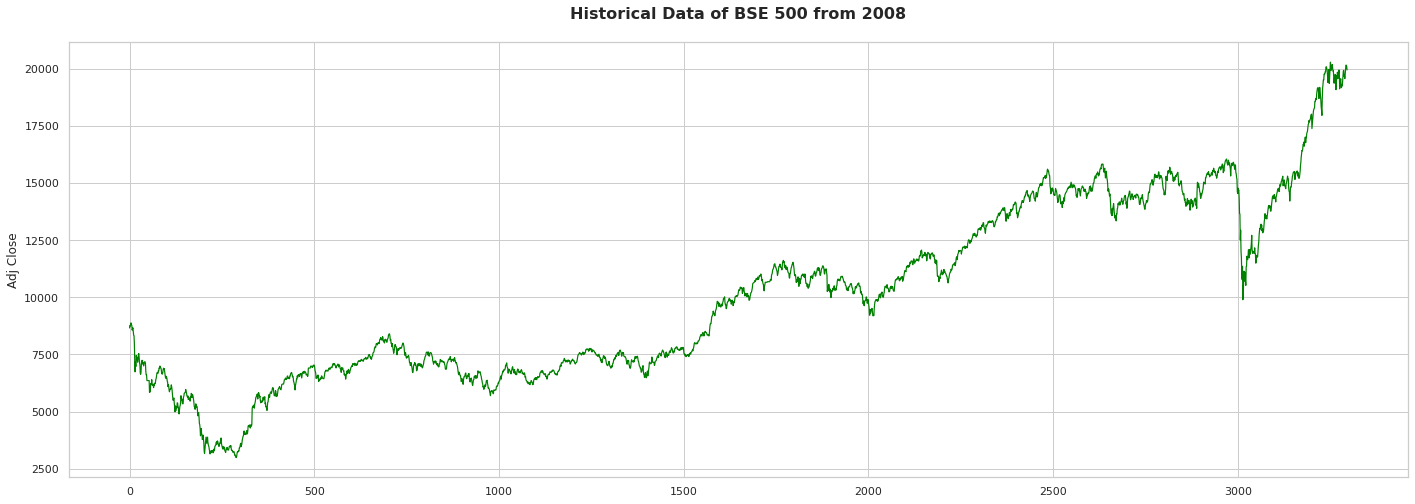

In [ ]:
# Plot to understand the trend of stock prices
plt.figure(figsize=(24,8))
sns.lineplot(x = stock_data.index, y= stock_data['Adj Close'],linewidth = 1.2,color = 'green')
plt.title('Historical Data of BSE 500 from 2008\n', fontdict= {'fontsize':16,'fontweight':'bold'})
plt.show()

## Data Cleaning 

In [ ]:
# Changing date to python date object
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format = '%Y-%m-%d')

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3297 non-null   datetime64[ns]
 1   Open       3254 non-null   float64       
 2   High       3254 non-null   float64       
 3   Low        3254 non-null   float64       
 4   Close      3254 non-null   float64       
 5   Adj Close  3254 non-null   float64       
 6   Volume     3254 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 180.4 KB


In [ ]:
stock_data[stock_data['Adj Close'].isnull() == 1][0:5]

,Date,Open,High,Low,Close,Adj Close,Volume
321,2009-04-30,NaN,NaN,NaN,NaN,NaN,NaN
484,2009-12-23,NaN,NaN,NaN,NaN,NaN,NaN
485,2009-12-24,NaN,NaN,NaN,NaN,NaN,NaN
486,2009-12-29,NaN,NaN,NaN,NaN,NaN,NaN
487,2009-12-30,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filling the null values with values in previous date
stock_data =stock_data.fillna(method='bfill')

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3297 non-null   datetime64[ns]
 1   Open       3297 non-null   float64       
 2   High       3297 non-null   float64       
 3   Low        3297 non-null   float64       
 4   Close      3297 non-null   float64       
 5   Adj Close  3297 non-null   float64       
 6   Volume     3297 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 180.4 KB


## creating two new features 

In [ ]:
# Creating Fluctuations column by checking the volume increased from previous date or not
stock_data['Fluctuations'] = np.where(stock_data['Volume'].shift(-1) > stock_data['Volume'],1,0)

# Returns column which gives % change in price from previous date
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'][0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


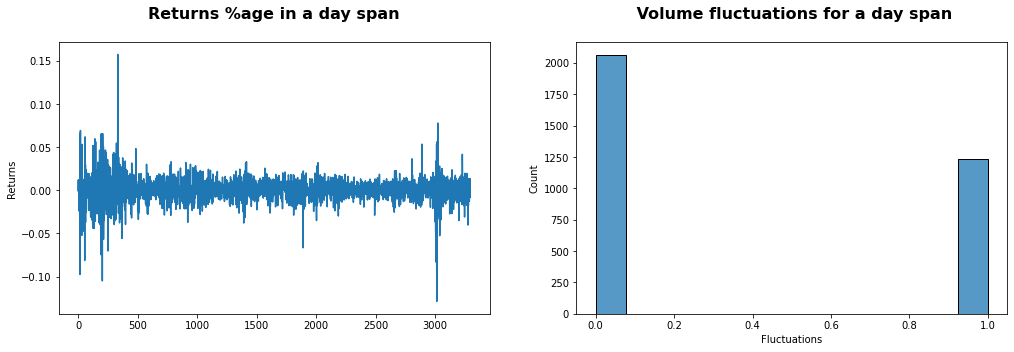

In [ ]:
plt.subplots(figsize=(17,5))
plt.subplot(1,2,1)
sns.lineplot(x = stock_data.index, y= stock_data['Returns'])
plt.title('Returns %age in a day span\n', fontdict= {'fontsize':16,'fontweight':'bold'})

plt.subplot(1,2,2)
sns.histplot(x= stock_data['Fluctuations'])
plt.title(' Volume fluctuations for a day span\n', fontdict= {'fontsize':16,'fontweight':'bold'})
plt.show()

In [ ]:
stock_data = round(stock_data,4)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns
0,2008-01-01,8620.0996,8685.3203,8601.2402,8660.6299,8660.6299,325195300.0,1,0.0000
1,2008-01-02,8703.6201,8787.3604,8595.0801,8765.7305,8765.7305,427995000.0,0,0.0121
2,2008-01-03,8733.5596,8817.0898,8719.8496,8746.0400,8746.0400,344790300.0,1,-0.0022
3,2008-01-04,8770.0996,8888.5996,8770.0996,8850.4805,8850.4805,381472400.0,0,0.0119
4,2008-01-07,8817.2305,8910.3701,8764.8398,8882.2803,8882.2803,355712200.0,1,0.0036
...,...,...,...,...,...,...,...,...,...
3292,2021-05-06,19866.3594,19922.7695,19758.2695,19903.8496,19903.8496,200.0,1,0.0070
3293,2021-05-07,20126.1699,20198.6504,20102.1992,20173.7598,20173.7598,300.0,0,0.0136
3294,2021-05-10,20126.1699,20198.6504,20102.1992,20173.7598,20173.7598,300.0,0,0.0000
3295,2021-05-11,20022.1992,20183.7793,19971.9902,20132.5508,20132.5508,300.0,1,-0.0020


In [ ]:
# Verifying if there are any null values
stock_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Fluctuations    0
Returns         0
dtype: int64

## For Categorical Analysis of News Headlines

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/india-news-headlines.csv'
news_data = pd.read_csv(path)

In [ ]:
news_data.head(-1)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424061,20201231,city.bengaluru,Peddler nabbed; 10kg ganja seized in Anantapur...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...


In [ ]:
# dropping category column
news_data= news_data.drop('headline_category',axis =1)

# renamining date column
news_data = news_data.rename(columns = {'publish_date':'Date'})

# Changing date to python date format
from datetime import datetime
news_data['Date'] = pd.to_datetime(news_data['Date'], format = '%Y%m%d')
news_data

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [ ]:
news_data['headline_text'].value_counts()

Straight Answers                                              6723
Cartoons                                                      1536
Straight answers                                              1500
Photogallery                                                  1353
Your say                                                      1012
                                                              ... 
Truck set ablaze by blockade supporters in Manipur               1
Saqib Saleem shows off his swag with great suave and charm       1
Committed to theater                                             1
No anti-incumbency wave; we're way ahead: Tanwar                 1
Focus on biodiversity for next generation                        1
Name: headline_text, Length: 3168800, dtype: int64

In [ ]:
news_data.duplicated().sum()

154493

In [ ]:
#dropping the duplicates only keeping the last value of each duplicates
news_data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

news_data.duplicated().sum()

0

In [ ]:
#getting a list of unique dates in Date column
lst = news_data['Date'].value_counts().index.tolist()

#concatenating all the headline_text column values of same date as a single row
new = []
for x in lst:
  df = news_data.loc[news_data['Date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
  new.append(headlinetext)


In [ ]:
newsdf = pd.DataFrame({'Date': lst, 'headline_text' : new})
newsdf = newsdf.sort_values(by='Date',ignore_index=True)
newsdf

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark. Thin...
2,2001-01-04,Claire Danes inks to star in 'It's About Love'...
3,2001-01-05,Faleiro vows to fight common cadre proposal. T...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## <br> Subjectivity -> distinguishes factual and personal feeling, expression,opinion or statement. Ranges from 0(Objective,factual) to 1(Totally subjective)

## Polarity --> tells the how the text sounds as positive, negative, compound or neutral

In [ ]:
# Creating subjectivity for headlines

# Function for polarity & subjectivity
subjectivity = []
for idx, row in newsdf.iterrows():
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [ ]:
newsdf['subjectivity'] = subjectivity

In [ ]:
cmpnd, pos, neg, neu = [],[],[],[]
sia = SentimentIntensityAnalyzer()

for hdln in newsdf['headline_text']:
  sscore = sia.polarity_scores(hdln)
  for k in sorted(sscore):
    if k == 'compound':
      cmpnd.append(sscore[k])
    elif k == 'neg':
      neg.append(sscore[k])
    elif k == 'neu':
      neu.append(sscore[k])
    else:
      pos.append(sscore[k])

In [ ]:
newsdf['compound'] = cmpnd
newsdf['positive'] = pos
newsdf['negative'] = neg
newsdf['neutral'] = neu

In [ ]:
newsdf

,Date,subjectivity,compound,positive,negative,neutral
0,2001-01-02,0.293056,-0.9815,0.075,0.144,0.781
1,2001-01-03,0.407692,-0.2640,0.111,0.122,0.767
2,2001-01-04,0.481895,0.9026,0.105,0.094,0.801
3,2001-01-05,0.465542,0.8175,0.151,0.123,0.726
4,2001-01-06,0.464935,-0.5574,0.133,0.165,0.702
...,...,...,...,...,...,...
7257,2020-12-27,0.388231,-0.9997,0.075,0.128,0.797
7258,2020-12-28,0.413737,-0.9998,0.092,0.138,0.770
7259,2020-12-29,0.417092,-0.9998,0.094,0.144,0.762
7260,2020-12-30,0.443983,-0.9999,0.080,0.138,0.781


## Merging Two Datasets

#### size of bse stock prizes is 3297x7<br> size of headlines data is 7262× 2 <br> How to merge?<hr>

## We use date attribute to merge stockdta with news data

In [ ]:
# Merging all headlines of same data to one row
data_merged = pd.merge(stock_data, newsdf, how='inner', on='Date')

# Creating another feature considering mean of stock prices
data_merged['Price'] = round((data_merged['High']+data_merged['Low']+data_merged['Close']+data_merged['Open'])/4,4)
data_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,subjectivity,compound,positive,negative,neutral,Price
0,2008-01-01,8620.0996,8685.3203,8601.2402,8660.6299,8660.6299,325195300.0,1,0.0000,0.407413,-0.9988,0.093,0.162,0.746,8641.8225
1,2008-01-02,8703.6201,8787.3604,8595.0801,8765.7305,8765.7305,427995000.0,0,0.0121,0.440670,-0.9998,0.109,0.210,0.681,8712.9478
2,2008-01-03,8733.5596,8817.0898,8719.8496,8746.0400,8746.0400,344790300.0,1,-0.0022,0.478832,-0.9995,0.091,0.183,0.726,8754.1348
3,2008-01-04,8770.0996,8888.5996,8770.0996,8850.4805,8850.4805,381472400.0,0,0.0119,0.393586,-0.9991,0.098,0.159,0.743,8819.8198
4,2008-01-07,8817.2305,8910.3701,8764.8398,8882.2803,8882.2803,355712200.0,1,0.0036,0.371306,-0.9980,0.096,0.143,0.761,8843.6802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,2020-12-24,17947.3906,18020.1094,17869.5898,17992.0098,17992.0098,400.0,0,0.0091,0.394551,-0.9988,0.065,0.093,0.842,17957.2749
3205,2020-12-28,18079.1504,18178.5195,18078.4297,18164.8691,18164.8691,200.0,0,0.0096,0.413737,-0.9998,0.092,0.138,0.770,18125.2422
3206,2020-12-29,18232.9805,18282.6602,18119.9707,18218.9102,18218.9102,200.0,1,0.0030,0.417092,-0.9998,0.094,0.144,0.762,18213.6304
3207,2020-12-30,18284.5391,18298.8203,18135.2305,18284.3105,18284.3105,300.0,1,0.0036,0.443983,-0.9999,0.080,0.138,0.781,18250.7251


In [ ]:
X = data_merged.drop(labels = ['Price','Date'],axis =1)
y = data_merged['Price']
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.15,shuffle= False)

In [ ]:
# TO check splitting 
print('The size of Xtrain is ',Xtrain.shape,'\nThe size of Xtest is', Xtest.shape,'\nThe size of ytrain is', ytrain.shape,'\nThe size of ytest is', ytest.shape)

The size of Xtrain is  (2727, 13) 
The size of Xtest is (482, 13) 
The size of ytrain is (2727,) 
The size of ytest is (482,)


## Hybrid Model Implementation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
ypredRf=rf.predict(Xtest)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(Xtrain, ytrain)
ypredAdb = adb.predict(Xtest)

In [ ]:
df = pd.DataFrame({'yactual':ytest,'ypred-Randomforest': ypredRf ,'ypred-Adaboost':ypredAdb})
df[0:10]

,yactual,ypred-Randomforest,ypred-Adaboost
2727,14527.3999,14515.126118,14717.775714
2728,14509.5801,14498.848349,14717.775714
2729,14518.7151,14526.378707,14717.775714
2730,14478.0127,14476.689757,14717.775714
2731,14434.2327,14446.845645,14717.775714
2732,14381.4224,14381.240712,14717.775714
2733,14345.8450,14346.955208,14717.775714
2734,14172.2952,14150.992823,14143.599181
2735,14071.9175,14072.424089,13986.189977
2736,14105.1228,14102.441644,14032.454733


In [ ]:
from sklearn.metrics import mean_absolute_error
abs_errAdb = mean_absolute_error(ypredAdb,ytest)
abs_err_Rf = mean_absolute_error(ypredRf,ytest)
print('Mean Absolute error of Adaboost',round(abs_errAdb,4),'\nMean Absolute error of Random-Forest',round(abs_err_Rf,4))

Mean Absolute error of Adaboost 460.0933 
Mean Absolute error of Random-Forest 132.6532


## Let us visualize those results

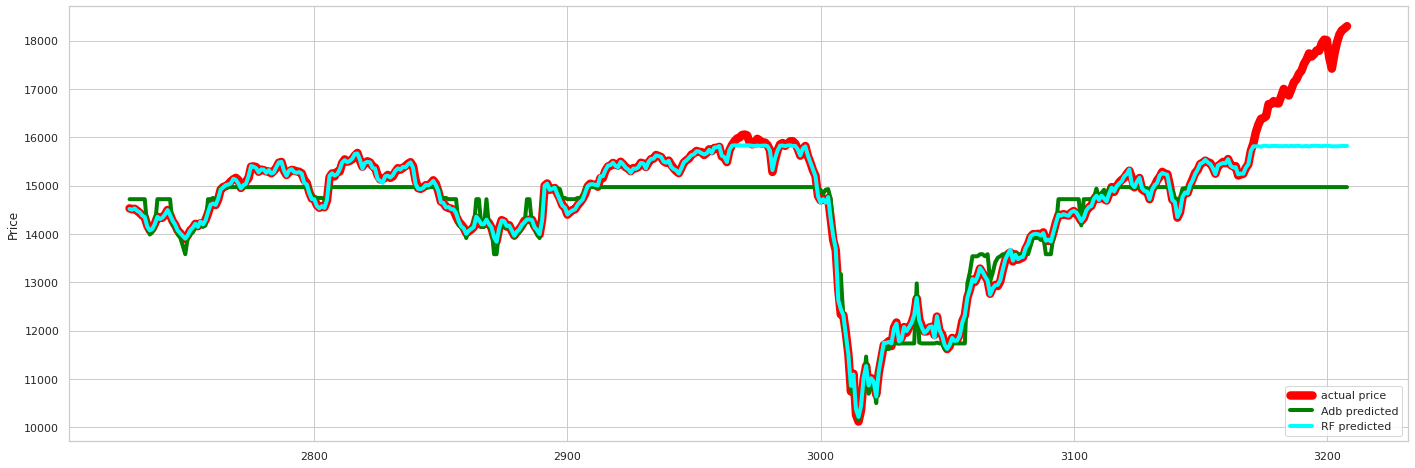

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(24,8))
sns.lineplot(x = range(2727,3209), y= ytest,label = 'actual price', color='red',linewidth=8.5)
sns.lineplot(x=range(2727,3209),y=ypredAdb,label="Adb predicted",color = 'green',linewidth=4)
sns.lineplot(x=range(2727,3209),y=ypredRf,label='RF predicted',color = 'cyan',linewidth=4)
plt.legend(loc= 'lower right')
plt.show()

## **Conclusion: <br> Random Forest regression have best performance in predicting the stock price**